# Introduction
We are employing a machine learning approach to predict the species of a penguin based on measurements given in the Palmer Penguins dataset.
---

This code block handles our **Training Data Acquisition**

In [78]:
import pandas as pd

train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

# Mapping full species names exclude scientific names
train["Species"] = train["Species"].str.split().str.get(0)

Here is a first look at our raw data:

In [79]:
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,31,Chinstrap,Anvers,Dream,"Adult, 1 Egg Stage",N63A1,Yes,11/24/08,40.9,16.6,187.0,3200.0,FEMALE,9.08458,-24.54903,NaN
1,PAL0809,41,Chinstrap,Anvers,Dream,"Adult, 1 Egg Stage",N74A1,Yes,11/24/08,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867,NaN
2,PAL0708,4,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,11/27/07,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
3,PAL0708,15,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,Yes,12/3/07,45.8,14.6,210.0,4200.0,FEMALE,7.79958,-25.62618,NaN
4,PAL0809,34,Chinstrap,Anvers,Dream,"Adult, 1 Egg Stage",N65A2,Yes,11/24/08,51.0,18.8,203.0,4100.0,MALE,9.23196,-24.17282,NaN


Explain Data Preparation

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df["Island"] = le.fit_transform(df["Island"]) # Convert Island to numerical
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

This is what our formatted data looks like

In [87]:
X_train.head()

,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,1,40.9,16.6,187.0,3200.0,9.08458,-24.54903,True,False,True,True,False
1,1,49.0,19.5,210.0,3950.0,9.53262,-24.66867,True,False,True,False,True
2,0,50.0,15.2,218.0,5700.0,8.25540,-25.40075,True,False,True,False,True
3,0,45.8,14.6,210.0,4200.0,7.79958,-25.62618,True,False,True,True,False
4,1,51.0,18.8,203.0,4100.0,9.23196,-24.17282,True,False,True,False,True


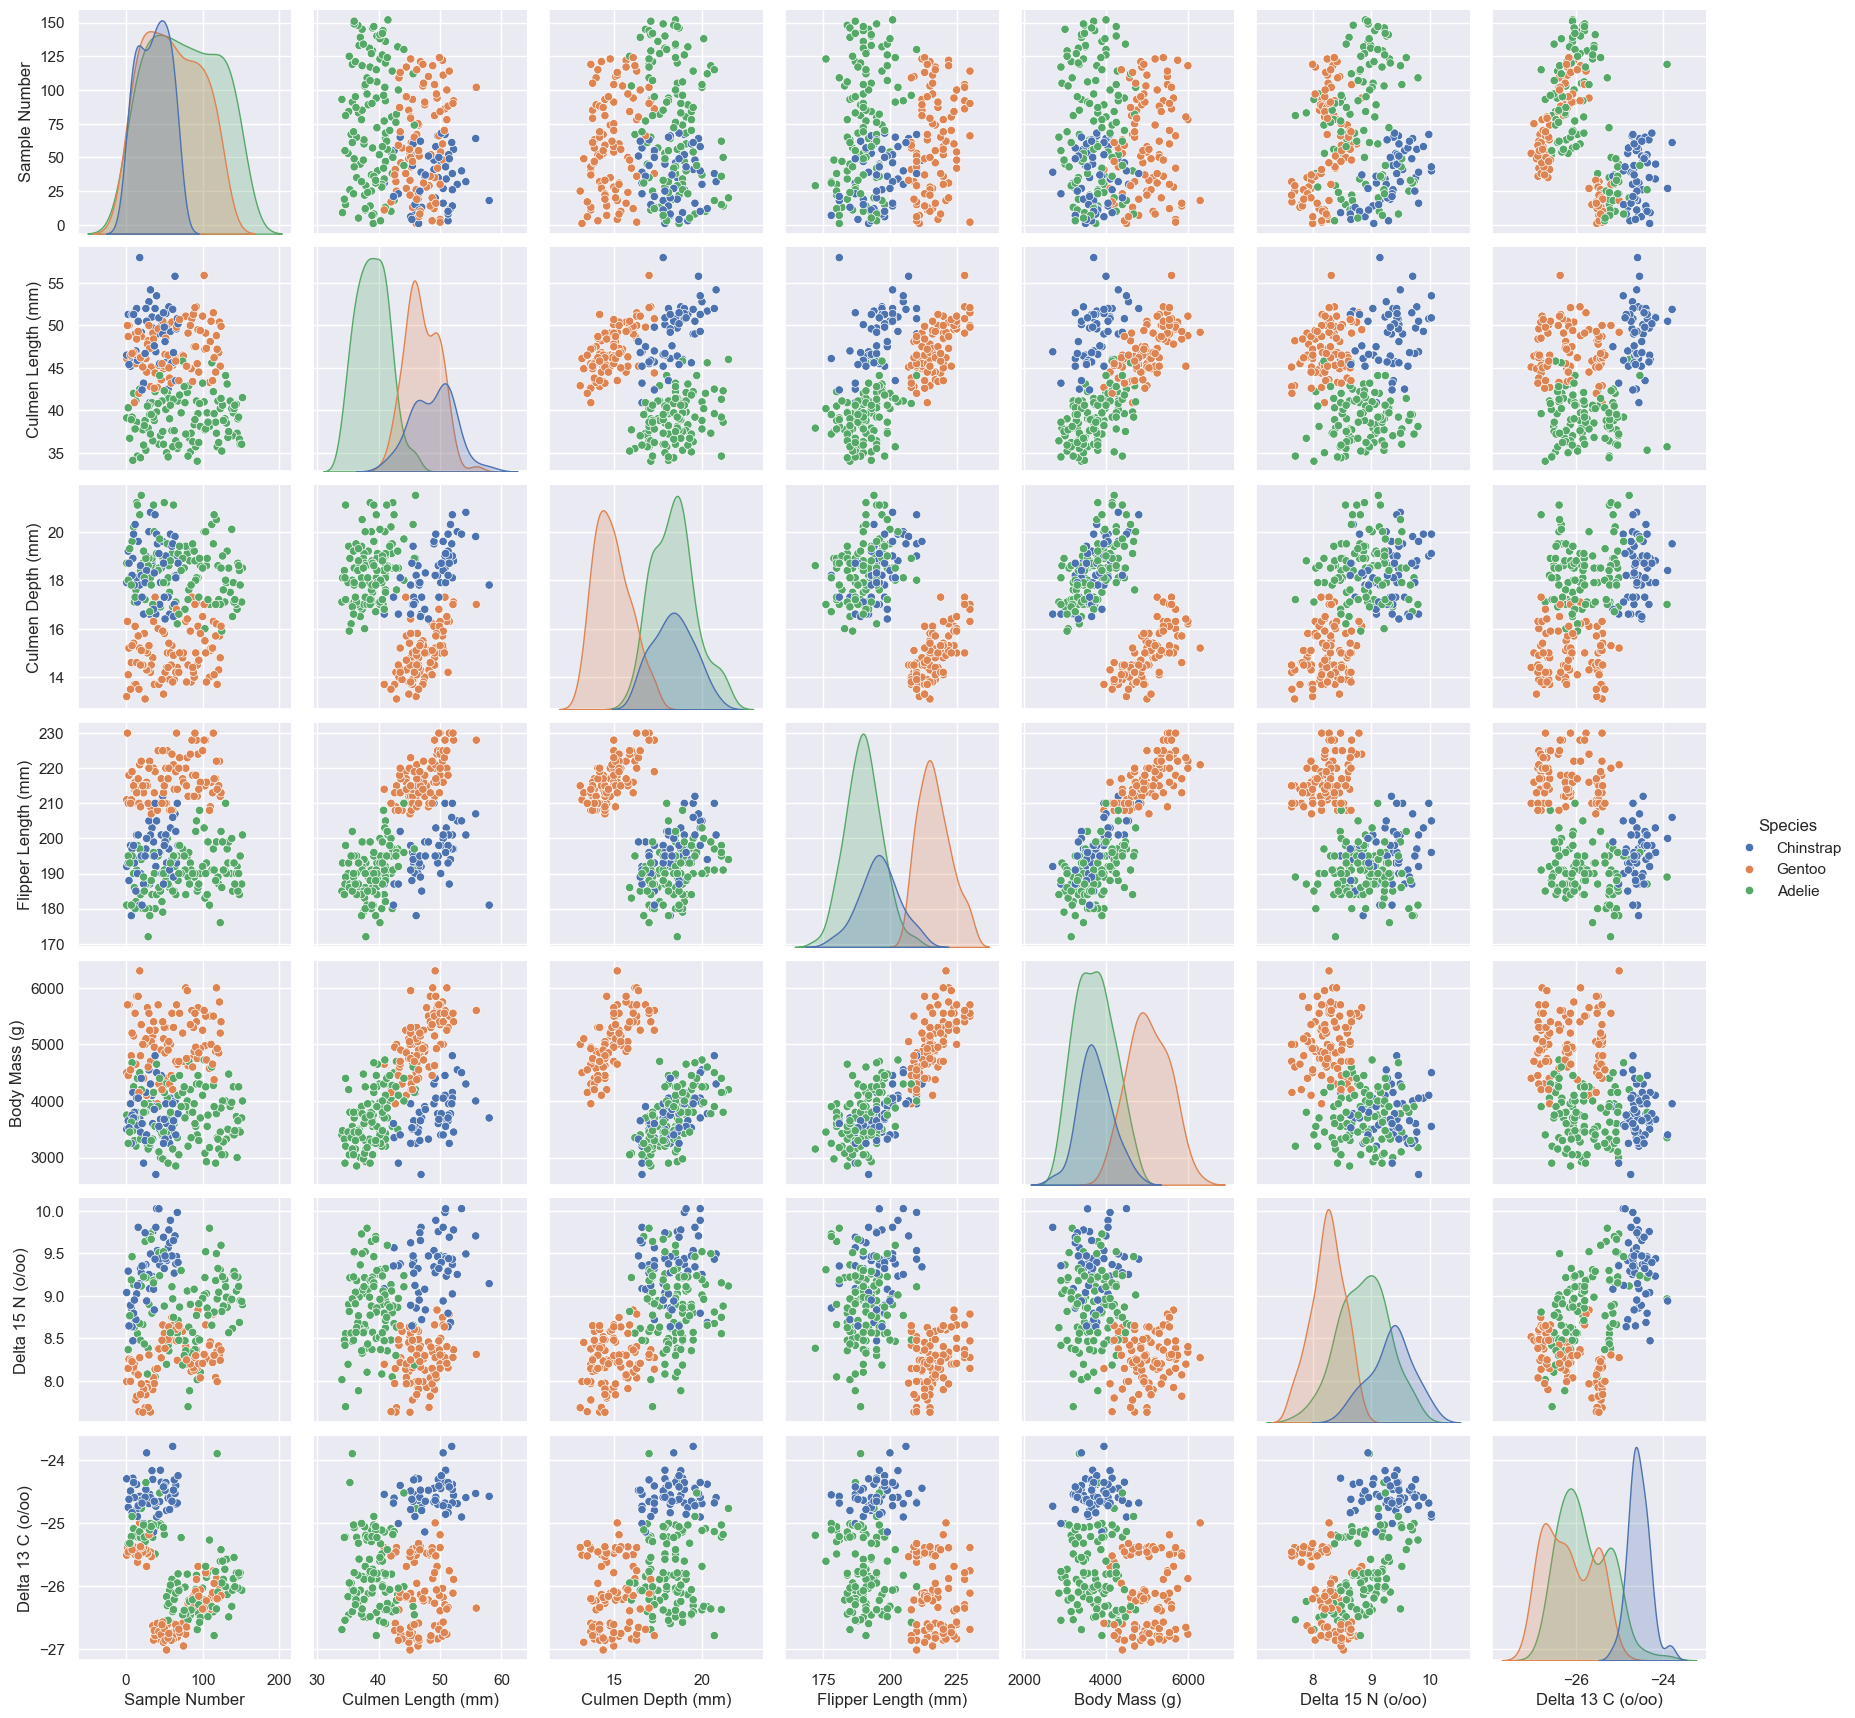

In [100]:
import seaborn as sns
sns.set_theme()
sns.pairplot(data=train, hue="Species")

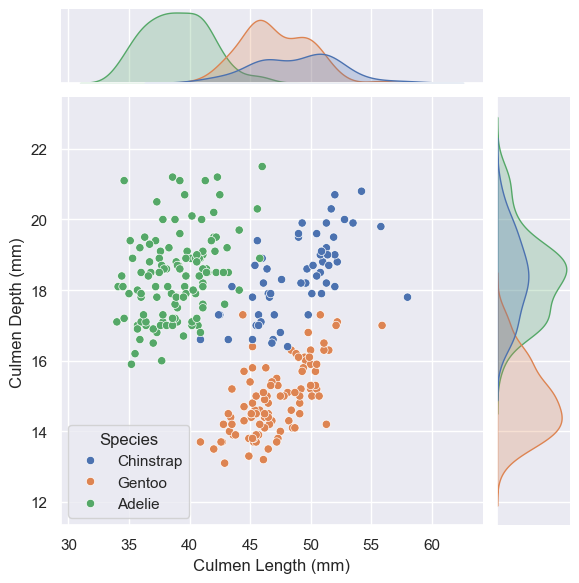

In [101]:
sns.jointplot(data = train, x = "Culmen Length (mm)", y = "Culmen Depth (mm)", hue = "Species")

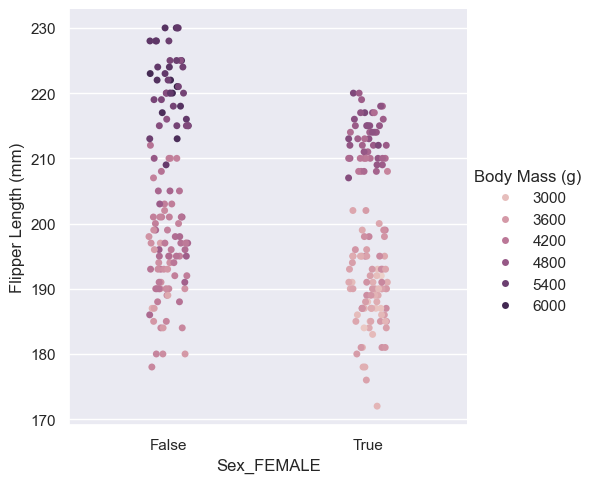

In [104]:
cat = sns.catplot(data = X_train, x = "Sex_FEMALE", y = "Flipper Length (mm)", hue = "Body Mass (g)")

In [88]:
import pandas as pd
import numpy as np
train.groupby(["Island", "Species"])["Flipper Length (mm)"].agg([np.mean, np.std])
# ([{"Average Flipper Length (mm)": np.mean}, {"Standard Deviation (mm)": np.std}])
#

C:\Users\lukka\AppData\Local\Temp\ipykernel_3300\3410091078.py:3: FutureWarning: The provided callable <function mean at 0x0000022A7AED6E50> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  train.groupby(["Island", "Species"])["Flipper Length (mm)"].agg([np.mean, np.std])
C:\Users\lukka\AppData\Local\Temp\ipykernel_3300\3410091078.py:3: FutureWarning: The provided callable <function std at 0x0000022A7AED6F70> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  train.groupby(["Island", "Species"])["Flipper Length (mm)"].agg([np.mean, np.std])


mean       std
Island    Species                        
Biscoe    Adelie     188.636364  6.570855
          Gentoo     216.752577  5.933715
Dream     Adelie     190.133333  6.780989
          Chinstrap  196.000000  7.423419
Torgersen Adelie     191.195122  6.626536

In [6]:
from itertools import combinations

# these are not actually all the columns: you'll 
# need to add any of the other ones you want to search for
all_qual_cols = ["Clutch Completion", "Sex"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = qual_cols + list(pair) 
    print(cols)
    # you could train models and score them here, keeping the list of 
    # columns for the model that has the best score. 

['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Culmen Depth (mm)']
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Flipper Length (mm)']
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Depth (mm)', 'Flipper Length (mm)']
['Sex_FEMALE', 'Sex_MALE', 'Culmen Length (mm)', 'Culmen Depth (mm)']
['Sex_FEMALE', 'Sex_MALE', 'Culmen Length (mm)', 'Flipper Length (mm)']
['Sex_FEMALE', 'Sex_MALE', 'Culmen Depth (mm)', 'Flipper Length (mm)']


In [7]:
from sklearn.linear_model import LogisticRegression

# this counts as 3 features because the two Clutch Completion 
# columns are transformations of a single original measurement. 
# you should find a way to automatically select some better columns
# as suggested in the code block above
cols = ["Flipper Length (mm)", "Body Mass (g)", "Clutch Completion_No", "Clutch Completion_Yes"]

LR = LogisticRegression()
LR.fit(X_train[cols], y_train)
LR.score(X_train[cols], y_train)

c:\Users\lukka\anaconda3\envs\ml-0451\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.63671875

In [8]:
test_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

X_test, y_test = prepare_data(test)
LR.score(X_test[cols], y_test)

0.75

In [9]:
from matplotlib import pyplot as plt
import numpy as np

In [10]:
from matplotlib.patches import Patch

def plot_regions(model, X, y):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1], 
            title = qual_features[i])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()

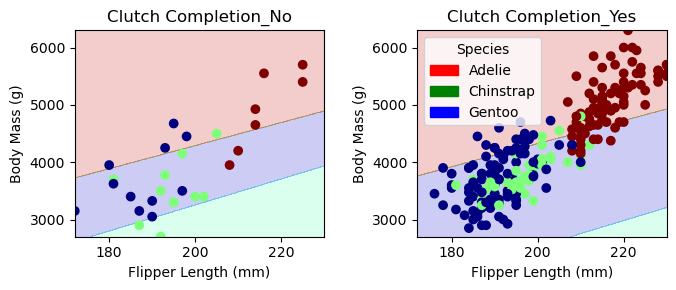

In [11]:
plot_regions(LR, X_train[cols], y_train)